## Task 4 SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import isnan
%matplotlib inline

### Read the csv data into a pandas dataframe and display the first 5 samples

In [108]:
heart_diseaseData = pd.read_csv('heart_disease.csv')
heart_diseaseData.head(5)
df=heart_diseaseData

### How many Categorical variables in the dataset?

In [109]:
print(heart_diseaseData.count(0))

male               4238
age                4238
education          4133
currentSmoker      4238
cigsPerDay         4209
BPMeds             4185
prevalentStroke    4238
prevalentHyp       4238
diabetes           4238
totChol            4188
sysBP              4238
diaBP              4238
BMI                4219
heartRate          4237
glucose            3850
TenYearCHD         4238
dtype: int64


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [110]:
heart_diseaseData.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### Bonus: Visual representation of missing values

<AxesSubplot:>

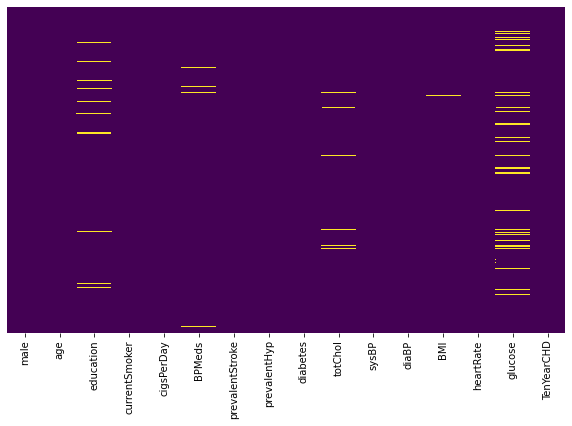

In [111]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [112]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [113]:
imputer = SimpleImputer(strategy='mean')

### Split data into dependent (y) and independent (X) variables 
Hint: TenYearCHD is the target

In [114]:
Y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values
print(Y,X)

[0 0 0 ... 0 0 0] [[  1.    39.     4.   ...  26.97  80.    77.  ]
 [  0.    46.     2.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  0.    48.     2.   ...  22.    84.    86.  ]
 [  0.    44.     1.   ...  19.16  86.      nan]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]


### Fit the imputer model on dataset to calculate statistic for each column

In [115]:
imputer.fit(X)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [116]:
Xtrans = imputer.transform(X)
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


### Sanity Check: Whether missing values are filled or not

In [117]:
heart_diseaseData.isnull().values.any()

True

### Let's try to visualize the missing values.
##### Hint: Heatmap needs a DataFrame and not a Numpy Array

<AxesSubplot:>

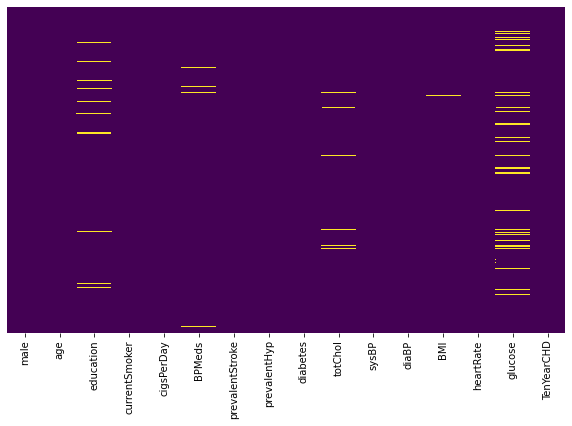

In [118]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [119]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

### Split the dataset into train and test data

# Build a Logistic Regression model with SimpleImputer Mean Strategy

### Create a Logistic Regression model

In [122]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Train the model

In [123]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Apply the model

In [124]:
df.apply(sum)

male                 1819.0
age                210141.0
education               NaN
currentSmoker        2094.0
cigsPerDay              NaN
BPMeds                  NaN
prevalentStroke        25.0
prevalentHyp         1316.0
diabetes              109.0
totChol                 NaN
sysBP              560909.5
diaBP              351302.5
BMI                     NaN
heartRate               NaN
glucose                 NaN
TenYearCHD            644.0
dtype: float64

### Find how well the trained model did with testing data

### Any observations? 